In [724]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import swifter

In [725]:
ROOT = '/kaggle/input/natural-diamonds-prices-images'

In [726]:
# Initialize an empty list to store DataFrames
dfs = []

# Function to read and append CSV files from a given directory
def read_and_append_csvs(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                dfs.append(df)

In [727]:
# Read CSV files from both 'Diamonds' and 'Diamonds2' directories
read_and_append_csvs(os.path.join(ROOT, 'Diamonds'))
read_and_append_csvs(os.path.join(ROOT, 'Diamonds2'))

# Concatenate all DataFrames
df = pd.concat(dfs, ignore_index=True)

In [728]:
# Clean price and parse as float
df['Price'] = df['Price'].apply(lambda x: str(x).replace(',', '')).astype(float)

In [729]:
# These categories have instances of only one occurence, ideally these should all go in the training set
# but for the sake of this exercise we are just going to drop them
for cat in ('Clarity', 'Colour'):
    category_counts = df[cat].value_counts()
    
    # Filter the DataFrame to keep only categories with more than one instance
    categories_to_keep = category_counts[category_counts > 1].index
    df = df[df[cat].isin(categories_to_keep)]

In [730]:
df.shape

(9762, 12)

In [731]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9762 entries, 0 to 9792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            9762 non-null   object 
 1   Shape         9762 non-null   object 
 2   Weight        9762 non-null   float64
 3   Clarity       9762 non-null   object 
 4   Colour        9762 non-null   object 
 5   Cut           9760 non-null   object 
 6   Polish        9762 non-null   object 
 7   Symmetry      9756 non-null   object 
 8   Fluorescence  9762 non-null   object 
 9   Messurements  9762 non-null   object 
 10  Price         9762 non-null   float64
 11  Data Url      3447 non-null   object 
dtypes: float64(2), object(10)
memory usage: 991.5+ KB


In [732]:
df.dtypes

Id               object
Shape            object
Weight          float64
Clarity          object
Colour           object
Cut              object
Polish           object
Symmetry         object
Fluorescence     object
Messurements     object
Price           float64
Data Url         object
dtype: object

In [733]:
df.head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price,Data Url
0,1799924,EMERALD,0.30,SI1,J,VG,EX,GD,F,4.32-3.27×2.25,588.97,https://capitalwholesalediamonds.com/product/0...
1,1800669,EMERALD,0.30,VS1,L,EX,EX,VG,N,4.40-3.33×2.25,616.85,https://capitalwholesalediamonds.com/product/0...
2,1799925,EMERALD,0.35,SI1,M,EX,GD,GD,N,4.71-3.56×2.37,622.53,https://capitalwholesalediamonds.com/product/0...
3,1800690,EMERALD,0.30,SI1,K,EX,EX,VG,F,4.75-3.28×2.01,628.53,https://capitalwholesalediamonds.com/product/0...
4,1800668,EMERALD,0.30,VS1,K,VG,VG,GD,N,4.60-3.25×2.13,642.22,https://capitalwholesalediamonds.com/product/0...


In [734]:
df.tail()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price,Data Url
9788,1751206,ROUND,0.50,SI1,E,EX,EX,EX,N,5.00-5.04×3.18,2453.10,NaN
9789,1773024,ROUND,0.50,SI1,E,EX,EX,EX,N,5.03-5.06×3.16,2453.10,NaN
9790,1789435,ROUND,0.50,VS2,D,VG,EX,VG,N,4.93-4.96×3.19,2453.20,NaN
9791,1774887,ROUND,0.52,SI1,H,EX,EX,EX,N,5.11-5.13×3.20,2453.41,NaN
9792,1630512,ROUND,0.50,VS1,H,EX,EX,VG,N,5.09-5.13×3.12,2453.69,NaN


In [735]:
# Drop duplicates and extraneous column
df = df.drop_duplicates().reset_index(drop=True)
df = df.drop('Data Url', axis=1)

In [736]:
df['Shape'].value_counts()

Shape
ROUND       3574
CUSHION     2050
OVAL         841
EMERALD      800
HEART        693
PRINCESS     624
PEAR         302
RADIANT       84
MARQUISE      68
Name: count, dtype: int64

In [737]:
df['Clarity'].value_counts()

Clarity
VS1     2084
SI1     1937
VS2     1854
SI2     1330
VVS2    1043
VVS1     560
IF       166
I1        53
I2         9
Name: count, dtype: int64

In [738]:
df['Colour'].value_counts()

Colour
E        1687
F        1484
D        1085
G        1014
I         851
H         755
J         685
K         517
FANCY     301
L         289
M         135
N          75
U-V        46
W-X        45
O-P        21
S-T        19
Y-Z        14
Q-R        13
Name: count, dtype: int64

In [739]:
df['Cut'].value_counts()

Cut
EX    6680
VG    1879
GD     450
F       25
Name: count, dtype: int64

In [740]:
df['Polish'].value_counts()

Polish
EX    7249
VG    1644
GD     140
F        3
Name: count, dtype: int64

In [741]:
df['Fluorescence'].value_counts()

Fluorescence
N      6507
F      1601
M       596
ST      295
VS       20
VSL      10
SL        7
Name: count, dtype: int64

In [742]:
import re

In [743]:
def extract_measurements(measurement):
    # Regular expression to match the pattern
    match = re.search(r'(\d+\.\d+)\s*[-–]\s*(\d+\.\d+)\s*[x×]\s*(\d+\.\d+)', measurement)
    if match:
        height = float(match.group(1))
        width = float(match.group(2))
        depth = float(match.group(3))
        return height, width, depth
    else:
        return None, None, None

In [744]:
# Apply the function to create new columns
df[['Height', 'Width', 'Depth']] = df['Messurements'].apply(extract_measurements).apply(pd.Series)

df = df.drop('Messurements', axis=1)

df.head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Price,Height,Width,Depth
0,1799924,EMERALD,0.30,SI1,J,VG,EX,GD,F,588.97,4.32,3.27,2.25
1,1800669,EMERALD,0.30,VS1,L,EX,EX,VG,N,616.85,4.40,3.33,2.25
2,1799925,EMERALD,0.35,SI1,M,EX,GD,GD,N,622.53,4.71,3.56,2.37
3,1800690,EMERALD,0.30,SI1,K,EX,EX,VG,F,628.53,4.75,3.28,2.01
4,1800668,EMERALD,0.30,VS1,K,VG,VG,GD,N,642.22,4.60,3.25,2.13


In [745]:
import matplotlib.pyplot as plt
import seaborn as sns

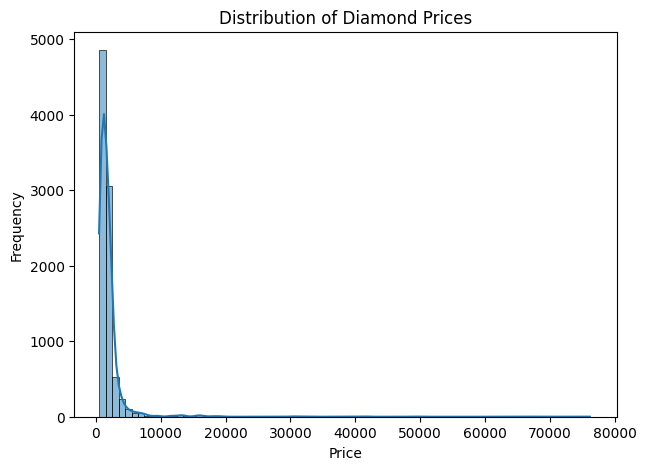

In [746]:
plt.figure(figsize=(7, 5))
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

_ = sns.histplot(data=df, x='Price', bins=30, binwidth=1000, kde=True)

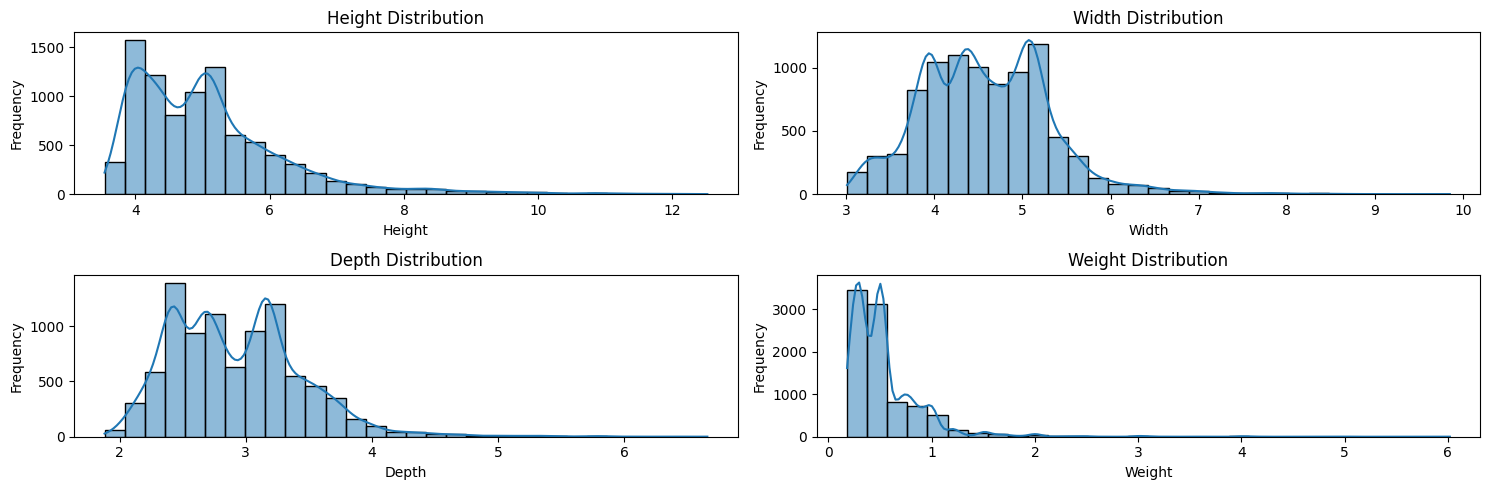

In [747]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

# Columns to plot
columns = ['Height', 'Width', 'Depth', 'Weight']

for i, col in enumerate(columns):
    row = i // 2
    col_idx = i % 2
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col.capitalize()} Distribution')
    axes[row, col_idx].set_xlabel(f'{col.capitalize()}' if col != 'weight' else f'{col.capitalize()} (carat)')
    axes[row, col_idx].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

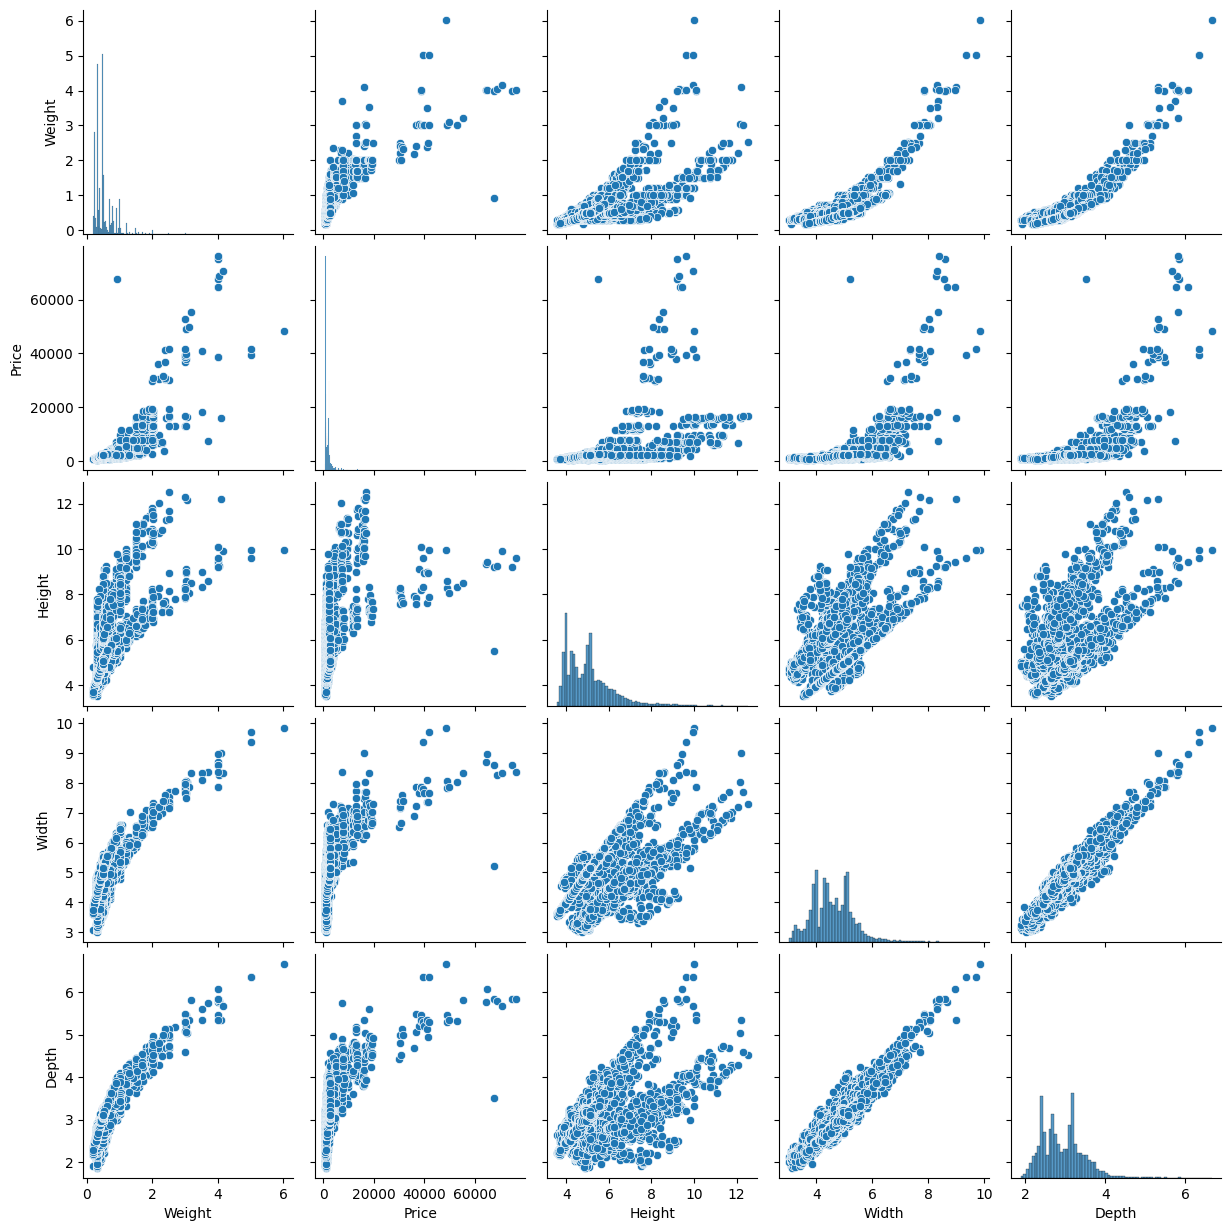

In [748]:
sns.pairplot(df)

In [749]:
# Define the base directories for the images
image_dirs = [
    os.path.join(ROOT, 'Diamonds', 'Diamonds', 'images'),
    os.path.join(ROOT, 'Diamonds2', 'images')
]

# Function to get the fully qualified path for the image
def get_image_path(id):
    for image_dir in image_dirs:
        for folder in os.listdir(image_dir):
            folder_path = os.path.join(image_dir, folder)
            if os.path.isdir(folder_path):
                image_path = os.path.join(folder_path, f'{id}.jpg')  # Assuming .jpg extension
                if os.path.exists(image_path):
                    return image_path
    return None

In [750]:
# Apply the function to create a new column with the image paths
df['image_path'] = df['Id'].swifter.apply(get_image_path)
df = df.drop('Id', axis=1)
df.head()

Pandas Apply:   0%|          | 0/9036 [00:00<?, ?it/s]

,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Price,Height,Width,Depth,image_path
0,EMERALD,0.30,SI1,J,VG,EX,GD,F,588.97,4.32,3.27,2.25,/kaggle/input/natural-diamonds-prices-images/D...
1,EMERALD,0.30,VS1,L,EX,EX,VG,N,616.85,4.40,3.33,2.25,/kaggle/input/natural-diamonds-prices-images/D...
2,EMERALD,0.35,SI1,M,EX,GD,GD,N,622.53,4.71,3.56,2.37,/kaggle/input/natural-diamonds-prices-images/D...
3,EMERALD,0.30,SI1,K,EX,EX,VG,F,628.53,4.75,3.28,2.01,/kaggle/input/natural-diamonds-prices-images/D...
4,EMERALD,0.30,VS1,K,VG,VG,GD,N,642.22,4.60,3.25,2.13,/kaggle/input/natural-diamonds-prices-images/D...


In [751]:
def does_image_not_exist(path):
    try:
        if not os.path.exists(path):
            return np.nan
        return path
    except:
        return np.nan

df['image_path'] = df['image_path'].swifter.apply(does_image_not_exist)
df = df.dropna().reset_index(drop=True)

Pandas Apply:   0%|          | 0/9036 [00:00<?, ?it/s]

In [752]:
df = pd.get_dummies(df, columns=['Clarity', 'Colour', 'Cut', 'Polish', 'Symmetry', 'Fluorescence'], dtype=int, drop_first=True)

In [753]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [754]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.2, random_state=42, stratify=df['Shape'])

In [755]:
X_train = pd.get_dummies(X_train, columns=['Shape'], dtype=int, drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Shape'], dtype=int, drop_first=True)

In [756]:
ss = StandardScaler()
X_train[["Weight", "Height", "Width", "Depth"]] = ss.fit_transform(X_train[["Weight", "Height", "Width", "Depth"]])
X_test[["Weight", "Height", "Width", "Depth"]] = ss.transform(X_test[["Weight", "Height", "Width", "Depth"]])

In [757]:
X_train, y_train = X_train.reset_index(drop=True), y_train.reset_index(drop=True)
X_test, y_test = X_test.reset_index(drop=True), y_test.reset_index(drop=True)

In [758]:
import torch

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# Define the custom dataset class
class DiamondDataset(Dataset):
    def __init__(self, df, target, transform=None):
        self.df = df
        self.target = target
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Load tabular data
        tabular_data = self.df.iloc[idx, :].drop('image_path').values.astype(float)
        
        # Load image
        image_path = self.df.iloc[idx]['image_path']
        image = Image.open(image_path).convert('RGB')
        
        # Apply transformations if any
        if self.transform:
            image = self.transform(image)
        
        # Convert tabular data to tensor
        tabular_tensor = torch.tensor(tabular_data, dtype=torch.float32)
        
        # Return the data in the desired tensor format
        return image, tabular_tensor, torch.tensor(self.target[idx].astype(float), dtype=torch.float32).unsqueeze(-1)

# Define the transformation for images
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize the image to a fixed size
    transforms.ToTensor(),          # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

In [759]:
train_dataset = DiamondDataset(X_train, y_train.values, transform=transform)
test_dataset = DiamondDataset(X_test, y_test.values, transform=transform)

# Create a DataLoader
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=os.cpu_count())
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=os.cpu_count())


# Example usage: Iterate through the DataLoader
for images, tabular_data, target in train_dataloader:
    print(f"Images shape: {images.shape}")  # Should be (batch_size, 3, 64, 64)
    print(f"Tabular data shape: {tabular_data.shape}")  # Should be (batch_size, num_features)
    print(f"Target data shape: {target.shape}")  # Should be (batch_size, 1)
    break  # Break after the first batch for demonstration

Images shape: torch.Size([32, 3, 128, 128])
Tabular data shape: torch.Size([32, 52])
Target data shape: torch.Size([32, 1])


In [760]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms

In [761]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class CombinedModel(nn.Module):
    def __init__(self, num_tabular_features, num_classes):
        super(CombinedModel, self).__init__()
        
        # Load a pre-trained CNN (e.g., ResNet18)
        self.cnn = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        
        # for param in self.cnn.parameters():
        #     param.requires_grad = True
        
        # Replace the last layer of the CNN to match the desired output size
        num_features = self.cnn.fc.in_features
        self.cnn.fc = nn.Identity()  # Remove the last fully connected layer
        
        # Define a fully connected layer to combine image and tabular features
        self.fc1 = nn.Linear(num_features + num_tabular_features, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, num_classes)
        
        # Activation functions
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, image, tabular):
        # Extract features from the image using the pre-trained CNN
        image_features = self.cnn(image)
        
        # Concatenate image features and tabular data
        combined_features = torch.cat((image_features, tabular), dim=1)
        
        # Pass through fully connected layers
        x = self.relu(self.fc1(combined_features))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

In [762]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Create and train the linear regression model for comparison
linear_reg = LinearRegression()
# Log transform target for better results (yes I should've used TargetTransformRegressor; seemed like overkill)
linear_reg.fit(X_train.drop('image_path', axis=1), np.log1p(y_train))

# Predict on the validation set
y_pred = np.expm1(linear_reg.predict(X_test.drop('image_path', axis=1)))

# Calculate and print the MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression Validation MSE: {mse:.4f}')

Linear Regression Validation MSE: 1122940.5107


In [763]:
from tqdm import tqdm

num_tabular_features = 52
num_classes = 1

model = CombinedModel(num_tabular_features, num_classes).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.01)

# Early stopping parameters
patience = 20
best_val_loss = float('inf')
epochs_without_improvement = 0
best_model_path = 'best_model.pth'

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, tabular_data, targets in tqdm(train_dataloader, desc=f'Epoch {epoch + 1} Training'):
        images = images.to(device)
        tabular_data = tabular_data.to(device)
        targets = targets.to(device)
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images, tabular_data)
        
        # Compute loss
        loss = criterion(outputs, targets)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()
    
    # Print training statistics
    train_loss = running_loss / len(train_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}')
    
    # Validation loop
    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for images, tabular_data, targets in tqdm(test_dataloader, desc=f'Epoch {epoch + 1} Validation'):
            images = images.to(device)
            tabular_data = tabular_data.to(device)
            targets = targets.to(device)
            
            outputs = model(images, tabular_data)
            loss = criterion(outputs, targets)
            val_running_loss += loss.item()
    
    # Print validation statistics
    val_loss = val_running_loss / len(test_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}')
    
    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        torch.save(model.state_dict(), best_model_path)
        print(f'Best model saved with validation loss: {best_val_loss:.4f}')
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            break

# Load the best model
model.load_state_dict(torch.load(best_model_path))
model.eval()
print(f"Best MSE:{best_val_loss:.4f}")

Epoch 1 Training: 100%|██████████| 153/153 [00:07<00:00, 20.90it/s]


Epoch [1/200], Training Loss: 13996447.0758


Epoch 1 Validation: 100%|██████████| 39/39 [00:02<00:00, 17.94it/s]


Epoch [1/200], Validation Loss: 10794657.4071
Best model saved with validation loss: 10794657.4071


Epoch 2 Training: 100%|██████████| 153/153 [00:07<00:00, 20.99it/s]


Epoch [2/200], Training Loss: 11049952.7045


Epoch 2 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.86it/s]


Epoch [2/200], Validation Loss: 5694619.8826
Best model saved with validation loss: 5694619.8826


Epoch 3 Training: 100%|██████████| 153/153 [00:07<00:00, 21.75it/s]


Epoch [3/200], Training Loss: 6104090.3349


Epoch 3 Validation: 100%|██████████| 39/39 [00:01<00:00, 20.69it/s]


Epoch [3/200], Validation Loss: 3717068.2314
Best model saved with validation loss: 3717068.2314


Epoch 4 Training: 100%|██████████| 153/153 [00:07<00:00, 21.64it/s]


Epoch [4/200], Training Loss: 4901916.6417


Epoch 4 Validation: 100%|██████████| 39/39 [00:01<00:00, 20.61it/s]


Epoch [4/200], Validation Loss: 2957322.2364
Best model saved with validation loss: 2957322.2364


Epoch 5 Training: 100%|██████████| 153/153 [00:07<00:00, 21.48it/s]


Epoch [5/200], Training Loss: 4156619.4808


Epoch 5 Validation: 100%|██████████| 39/39 [00:01<00:00, 20.39it/s]


Epoch [5/200], Validation Loss: 2119772.6823
Best model saved with validation loss: 2119772.6823


Epoch 6 Training: 100%|██████████| 153/153 [00:07<00:00, 20.00it/s]


Epoch [6/200], Training Loss: 3074175.2973


Epoch 6 Validation: 100%|██████████| 39/39 [00:01<00:00, 19.75it/s]


Epoch [6/200], Validation Loss: 2460914.9724


Epoch 7 Training: 100%|██████████| 153/153 [00:07<00:00, 20.86it/s]


Epoch [7/200], Training Loss: 3928370.3592


Epoch 7 Validation: 100%|██████████| 39/39 [00:01<00:00, 19.56it/s]


Epoch [7/200], Validation Loss: 2227040.1146


Epoch 8 Training: 100%|██████████| 153/153 [00:07<00:00, 20.54it/s]


Epoch [8/200], Training Loss: 2684601.4630


Epoch 8 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.27it/s]


Epoch [8/200], Validation Loss: 1683350.0397
Best model saved with validation loss: 1683350.0397


Epoch 9 Training: 100%|██████████| 153/153 [00:08<00:00, 18.65it/s]


Epoch [9/200], Training Loss: 2726006.4460


Epoch 9 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.37it/s]


Epoch [9/200], Validation Loss: 2525887.3405


Epoch 10 Training: 100%|██████████| 153/153 [00:07<00:00, 20.67it/s]


Epoch [10/200], Training Loss: 2748870.7608


Epoch 10 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.10it/s]


Epoch [10/200], Validation Loss: 2540961.1080


Epoch 11 Training: 100%|██████████| 153/153 [00:07<00:00, 19.97it/s]


Epoch [11/200], Training Loss: 2648466.6401


Epoch 11 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.80it/s]


Epoch [11/200], Validation Loss: 2239412.0773


Epoch 12 Training: 100%|██████████| 153/153 [00:07<00:00, 20.05it/s]


Epoch [12/200], Training Loss: 3565657.6912


Epoch 12 Validation: 100%|██████████| 39/39 [00:02<00:00, 15.75it/s]


Epoch [12/200], Validation Loss: 1589971.8518
Best model saved with validation loss: 1589971.8518


Epoch 13 Training: 100%|██████████| 153/153 [00:08<00:00, 18.52it/s]


Epoch [13/200], Training Loss: 3081293.6133


Epoch 13 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.58it/s]


Epoch [13/200], Validation Loss: 1960530.5873


Epoch 14 Training: 100%|██████████| 153/153 [00:07<00:00, 19.60it/s]


Epoch [14/200], Training Loss: 2003700.8205


Epoch 14 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.77it/s]


Epoch [14/200], Validation Loss: 1380617.6596
Best model saved with validation loss: 1380617.6596


Epoch 15 Training: 100%|██████████| 153/153 [00:07<00:00, 19.86it/s]


Epoch [15/200], Training Loss: 3157279.5643


Epoch 15 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.72it/s]


Epoch [15/200], Validation Loss: 2218659.2812


Epoch 16 Training: 100%|██████████| 153/153 [00:08<00:00, 18.37it/s]


Epoch [16/200], Training Loss: 2500916.8176


Epoch 16 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.23it/s]


Epoch [16/200], Validation Loss: 1441773.0249


Epoch 17 Training: 100%|██████████| 153/153 [00:07<00:00, 20.20it/s]


Epoch [17/200], Training Loss: 2385466.9929


Epoch 17 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.43it/s]


Epoch [17/200], Validation Loss: 3764508.4435


Epoch 18 Training: 100%|██████████| 153/153 [00:07<00:00, 20.11it/s]


Epoch [18/200], Training Loss: 2861938.6363


Epoch 18 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.89it/s]


Epoch [18/200], Validation Loss: 1922675.2784


Epoch 19 Training: 100%|██████████| 153/153 [00:08<00:00, 18.62it/s]


Epoch [19/200], Training Loss: 2616542.4901


Epoch 19 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.29it/s]


Epoch [19/200], Validation Loss: 1585202.4665


Epoch 20 Training: 100%|██████████| 153/153 [00:07<00:00, 19.83it/s]


Epoch [20/200], Training Loss: 2447393.1539


Epoch 20 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.69it/s]


Epoch [20/200], Validation Loss: 1872144.5004


Epoch 21 Training: 100%|██████████| 153/153 [00:07<00:00, 20.15it/s]


Epoch [21/200], Training Loss: 2424033.1498


Epoch 21 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.46it/s]


Epoch [21/200], Validation Loss: 1572784.0633


Epoch 22 Training: 100%|██████████| 153/153 [00:08<00:00, 18.95it/s]


Epoch [22/200], Training Loss: 2323904.9326


Epoch 22 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.90it/s]


Epoch [22/200], Validation Loss: 1989661.9463


Epoch 23 Training: 100%|██████████| 153/153 [00:07<00:00, 20.25it/s]


Epoch [23/200], Training Loss: 2770739.4922


Epoch 23 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.55it/s]


Epoch [23/200], Validation Loss: 2681506.8259


Epoch 24 Training: 100%|██████████| 153/153 [00:07<00:00, 19.53it/s]


Epoch [24/200], Training Loss: 2726074.1484


Epoch 24 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.11it/s]


Epoch [24/200], Validation Loss: 1368677.3145
Best model saved with validation loss: 1368677.3145


Epoch 25 Training: 100%|██████████| 153/153 [00:07<00:00, 19.79it/s]


Epoch [25/200], Training Loss: 2424381.9829


Epoch 25 Validation: 100%|██████████| 39/39 [00:02<00:00, 15.58it/s]


Epoch [25/200], Validation Loss: 1211688.0705
Best model saved with validation loss: 1211688.0705


Epoch 26 Training: 100%|██████████| 153/153 [00:07<00:00, 20.03it/s]


Epoch [26/200], Training Loss: 1642689.3986


Epoch 26 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.58it/s]


Epoch [26/200], Validation Loss: 890386.9343
Best model saved with validation loss: 890386.9343


Epoch 27 Training: 100%|██████████| 153/153 [00:07<00:00, 19.88it/s]


Epoch [27/200], Training Loss: 2183668.7127


Epoch 27 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.31it/s]


Epoch [27/200], Validation Loss: 1132812.1280


Epoch 28 Training: 100%|██████████| 153/153 [00:07<00:00, 20.15it/s]


Epoch [28/200], Training Loss: 2011624.9277


Epoch 28 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.95it/s]


Epoch [28/200], Validation Loss: 1083384.3330


Epoch 29 Training: 100%|██████████| 153/153 [00:08<00:00, 18.72it/s]


Epoch [29/200], Training Loss: 1960237.1267


Epoch 29 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.08it/s]


Epoch [29/200], Validation Loss: 988296.9457


Epoch 30 Training: 100%|██████████| 153/153 [00:07<00:00, 20.01it/s]


Epoch [30/200], Training Loss: 1911908.2495


Epoch 30 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.35it/s]


Epoch [30/200], Validation Loss: 982369.4189


Epoch 31 Training: 100%|██████████| 153/153 [00:07<00:00, 20.01it/s]


Epoch [31/200], Training Loss: 1755678.8448


Epoch 31 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.88it/s]


Epoch [31/200], Validation Loss: 940324.1210


Epoch 32 Training: 100%|██████████| 153/153 [00:08<00:00, 18.94it/s]


Epoch [32/200], Training Loss: 1746853.6089


Epoch 32 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.87it/s]


Epoch [32/200], Validation Loss: 1026988.7432


Epoch 33 Training: 100%|██████████| 153/153 [00:07<00:00, 20.20it/s]


Epoch [33/200], Training Loss: 2051519.2319


Epoch 33 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.11it/s]


Epoch [33/200], Validation Loss: 1224297.9655


Epoch 34 Training: 100%|██████████| 153/153 [00:07<00:00, 20.51it/s]


Epoch [34/200], Training Loss: 1735570.3002


Epoch 34 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.94it/s]


Epoch [34/200], Validation Loss: 782439.9347
Best model saved with validation loss: 782439.9347


Epoch 35 Training: 100%|██████████| 153/153 [00:07<00:00, 19.91it/s]


Epoch [35/200], Training Loss: 1788229.8585


Epoch 35 Validation: 100%|██████████| 39/39 [00:02<00:00, 16.79it/s]


Epoch [35/200], Validation Loss: 740577.3622
Best model saved with validation loss: 740577.3622


Epoch 36 Training: 100%|██████████| 153/153 [00:07<00:00, 20.03it/s]


Epoch [36/200], Training Loss: 980085.4687


Epoch 36 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.52it/s]


Epoch [36/200], Validation Loss: 1342017.0550


Epoch 37 Training: 100%|██████████| 153/153 [00:07<00:00, 20.27it/s]


Epoch [37/200], Training Loss: 2374603.6634


Epoch 37 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.20it/s]


Epoch [37/200], Validation Loss: 534718.3438
Best model saved with validation loss: 534718.3438


Epoch 38 Training: 100%|██████████| 153/153 [00:07<00:00, 19.95it/s]


Epoch [38/200], Training Loss: 1554222.7483


Epoch 38 Validation: 100%|██████████| 39/39 [00:01<00:00, 19.53it/s]


Epoch [38/200], Validation Loss: 762241.4562


Epoch 39 Training: 100%|██████████| 153/153 [00:08<00:00, 19.02it/s]


Epoch [39/200], Training Loss: 1299237.3941


Epoch 39 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.21it/s]


Epoch [39/200], Validation Loss: 1358586.3269


Epoch 40 Training: 100%|██████████| 153/153 [00:07<00:00, 20.79it/s]


Epoch [40/200], Training Loss: 2275270.5127


Epoch 40 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.47it/s]


Epoch [40/200], Validation Loss: 1197577.0501


Epoch 41 Training: 100%|██████████| 153/153 [00:07<00:00, 20.34it/s]


Epoch [41/200], Training Loss: 2278956.9834


Epoch 41 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.45it/s]


Epoch [41/200], Validation Loss: 1601118.8160


Epoch 42 Training: 100%|██████████| 153/153 [00:07<00:00, 19.33it/s]


Epoch [42/200], Training Loss: 1391372.6800


Epoch 42 Validation: 100%|██████████| 39/39 [00:02<00:00, 18.78it/s]


Epoch [42/200], Validation Loss: 1382699.7099


Epoch 43 Training: 100%|██████████| 153/153 [00:07<00:00, 20.14it/s]


Epoch [43/200], Training Loss: 1720218.5287


Epoch 43 Validation: 100%|██████████| 39/39 [00:01<00:00, 19.71it/s]


Epoch [43/200], Validation Loss: 1407229.5164


Epoch 44 Training: 100%|██████████| 153/153 [00:07<00:00, 20.43it/s]


Epoch [44/200], Training Loss: 1678953.0171


Epoch 44 Validation: 100%|██████████| 39/39 [00:01<00:00, 19.57it/s]


Epoch [44/200], Validation Loss: 1062396.6126


Epoch 45 Training: 100%|██████████| 153/153 [00:07<00:00, 19.79it/s]


Epoch [45/200], Training Loss: 1292318.5841


Epoch 45 Validation: 100%|██████████| 39/39 [00:02<00:00, 17.56it/s]


Epoch [45/200], Validation Loss: 1259188.4834


Epoch 46 Training: 100%|██████████| 153/153 [00:07<00:00, 20.32it/s]


Epoch [46/200], Training Loss: 1118178.1434


Epoch 46 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.08it/s]


Epoch [46/200], Validation Loss: 1266976.4968


Epoch 47 Training: 100%|██████████| 153/153 [00:07<00:00, 20.34it/s]


Epoch [47/200], Training Loss: 1283764.2174


Epoch 47 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.05it/s]


Epoch [47/200], Validation Loss: 1050986.1021


Epoch 48 Training: 100%|██████████| 153/153 [00:08<00:00, 19.03it/s]


Epoch [48/200], Training Loss: 1530946.4475


Epoch 48 Validation: 100%|██████████| 39/39 [00:02<00:00, 16.46it/s]


Epoch [48/200], Validation Loss: 911913.5564


Epoch 49 Training: 100%|██████████| 153/153 [00:07<00:00, 19.13it/s]


Epoch [49/200], Training Loss: 943121.1971


Epoch 49 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.21it/s]


Epoch [49/200], Validation Loss: 1054366.8728


Epoch 50 Training: 100%|██████████| 153/153 [00:07<00:00, 19.93it/s]


Epoch [50/200], Training Loss: 1268356.8828


Epoch 50 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.19it/s]


Epoch [50/200], Validation Loss: 1094627.9611


Epoch 51 Training: 100%|██████████| 153/153 [00:07<00:00, 20.25it/s]


Epoch [51/200], Training Loss: 1581124.0380


Epoch 51 Validation: 100%|██████████| 39/39 [00:01<00:00, 19.55it/s]


Epoch [51/200], Validation Loss: 1042362.3695


Epoch 52 Training: 100%|██████████| 153/153 [00:07<00:00, 19.36it/s]


Epoch [52/200], Training Loss: 1366285.0889


Epoch 52 Validation: 100%|██████████| 39/39 [00:01<00:00, 19.69it/s]


Epoch [52/200], Validation Loss: 1041001.6987


Epoch 53 Training: 100%|██████████| 153/153 [00:07<00:00, 20.87it/s]


Epoch [53/200], Training Loss: 1591837.5813


Epoch 53 Validation: 100%|██████████| 39/39 [00:01<00:00, 19.72it/s]


Epoch [53/200], Validation Loss: 1120086.7197


Epoch 54 Training: 100%|██████████| 153/153 [00:07<00:00, 20.80it/s]


Epoch [54/200], Training Loss: 989042.5936


Epoch 54 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.39it/s]


Epoch [54/200], Validation Loss: 916025.8245


Epoch 55 Training: 100%|██████████| 153/153 [00:07<00:00, 19.77it/s]


Epoch [55/200], Training Loss: 1548646.0076


Epoch 55 Validation: 100%|██████████| 39/39 [00:02<00:00, 17.95it/s]


Epoch [55/200], Validation Loss: 1070755.2394


Epoch 56 Training: 100%|██████████| 153/153 [00:07<00:00, 20.21it/s]


Epoch [56/200], Training Loss: 2062890.0611


Epoch 56 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.42it/s]


Epoch [56/200], Validation Loss: 1009755.2330


Epoch 57 Training: 100%|██████████| 153/153 [00:07<00:00, 20.18it/s]


Epoch [57/200], Training Loss: 1003020.9626


Epoch 57 Validation: 100%|██████████| 39/39 [00:02<00:00, 19.40it/s]

Epoch [57/200], Validation Loss: 761389.0485
Early stopping triggered at epoch 57
Best MSE:534718.3438
